#objective function: f(x) = (x-2)**2+sin(5*x) 

# Import libreries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from mpl_toolkits.mplot3d import Axes3D 

np.random.seed(42)
torch.manual_seed(42)

# Objective Function: 

In [2]:
def objective_function(x):
    return (x-2)**2+np.sin(5*x) 

# Initial Data

In [3]:
x_samples = np.random.uniform(0, 4, 20) # Initial batch 
y_samples = objective_function(x_samples)

In [4]:
x_samples

array([1.49816048, 3.80285723, 2.92797577, 2.39463394, 0.62407456,
       0.62397808, 0.23233445, 3.46470458, 2.40446005, 2.83229031,
       0.08233798, 3.87963941, 3.32977056, 0.84935644, 0.72729987,
       0.73361804, 1.21696897, 2.09902573, 1.72778007, 1.16491656])

In [5]:
x_full = np.linspace(0, 4, 400)  # To draw the real function curve
y_full = objective_function(x_full)

In [53]:
x_full.shape

(400,)

# Visualization 

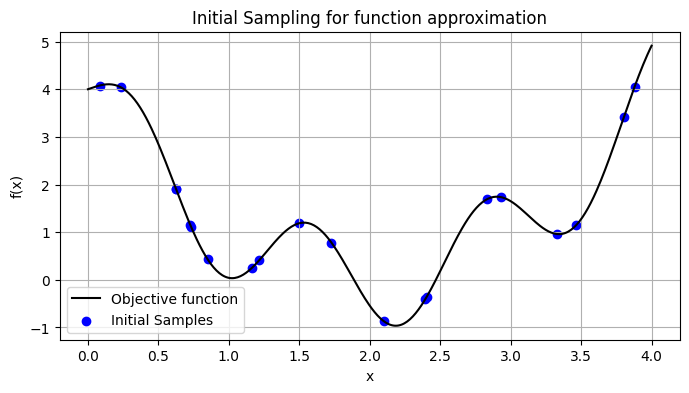

In [6]:
plt.figure(figsize=(8,4))
plt.plot(x_full, y_full, label = 'Objective function',color = 'black')
plt.scatter(x_samples, y_samples, color='blue',label='Initial Samples')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Initial Sampling for function approximation')
plt.legend()
plt.grid(True)
plt.show()

# DNN

## Convert to Tensor

In [7]:
x_train1 = torch.tensor(x_samples,dtype = torch.float32).unsqueeze(1)
y_train1 = torch.tensor(y_samples,dtype=torch.float32).unsqueeze(1)

In [8]:
x_train1

tensor([[1.4982],
        [3.8029],
        [2.9280],
        [2.3946],
        [0.6241],
        [0.6240],
        [0.2323],
        [3.4647],
        [2.4045],
        [2.8323],
        [0.0823],
        [3.8796],
        [3.3298],
        [0.8494],
        [0.7273],
        [0.7336],
        [1.2170],
        [2.0990],
        [1.7278],
        [1.1649]])

In [9]:
y_train1

tensor([[ 1.1866],
        [ 3.4143],
        [ 1.7374],
        [-0.4033],
        [ 1.9144],
        [ 1.9151],
        [ 4.0421],
        [ 1.1464],
        [-0.3540],
        [ 1.6924],
        [ 4.0776],
        [ 4.0546],
        [ 0.9602],
        [ 0.4304],
        [ 1.1448],
        [ 1.1012],
        [ 0.4161],
        [-0.8676],
        [ 0.7815],
        [ 0.2547]])

## Model1

In [9]:
model1= nn.Sequential(nn.Linear(1, 32), nn.ReLU(), nn.Linear(32, 32), nn.Linear(32, 1))
model1

Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Linear(in_features=32, out_features=1, bias=True)
)

## Loss Function 

In [10]:
criterion = nn.MSELoss()
criterion

MSELoss()

## Optimizer1

In [11]:
optimizer1 = optim.Adam(model1.parameters(),lr=0.01)
optimizer1

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [12]:
epochs = 500           
for epoch in range(epochs):
    model1.train()
    optimizer1.zero_grad()
    y_pred = model1(x_train1)
    loss = criterion(y_pred, y_train1)   # --> criterion = nn.MSELoss()
    loss.backward()
    optimizer1.step()

In [13]:
x_full_tensor = torch.tensor(x_full,dtype=torch.float32).unsqueeze(1)
#x_full_tensor

In [15]:
with torch.no_grad():
    y_pred_full = model1(x_full_tensor).squeeze().numpy()

In [18]:
x_full_tensor.shape

torch.Size([400, 1])

# Visualization

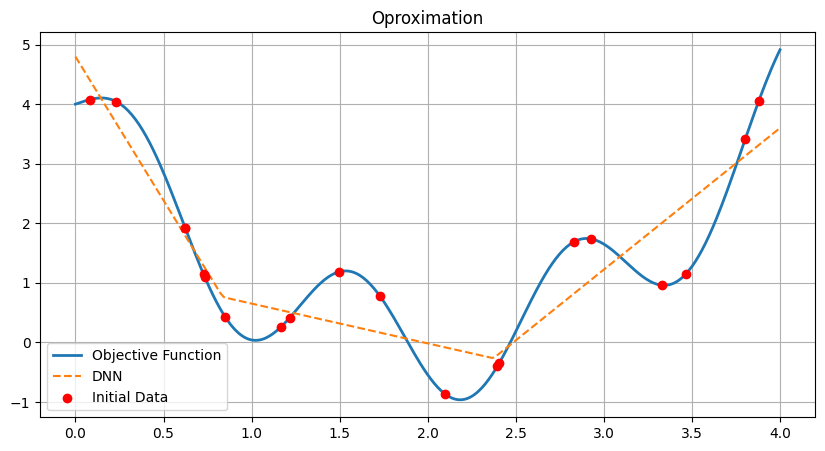

In [19]:
plt.figure(figsize=(10,5))
plt.plot(x_full, y_full, label= 'Objective Function', linewidth= '2')  
plt.plot(x_full, y_pred_full, label= 'DNN', linestyle= '--')
plt.scatter(x_samples, y_samples, color='red', label= 'Initial Data', zorder=5) 

plt.title('Oproximation')
plt.legend()
plt.grid()
plt.show()

# Refinement

## Find the x_value where the model predict the minimum of the function 

In [20]:
min_index = np.argmin(y_pred.detach().numpy())

In [21]:
x_min = x_full[min_index]

In [22]:
x_min

np.float64(0.03007518796992481)

## Genearate new data with noise around the current predicted minimum 

In [23]:
x_new = x_min + 0.05 * np.random.rand(20,)

In [24]:
x_new

array([0.06066783, 0.03704988, 0.04468242, 0.04839328, 0.05287869,
       0.06933399, 0.04005888, 0.05578691, 0.05969592, 0.03239771,
       0.06045243, 0.03860139, 0.03332777, 0.07751946, 0.07835679,
       0.07049506, 0.04530588, 0.03495879, 0.06428684, 0.05208281])

## Clip the new data to stay within the design domain [0, 4]

In [25]:
x_new = np.clip(x_new, 0, 4)
x_new

array([0.06066783, 0.03704988, 0.04468242, 0.04839328, 0.05287869,
       0.06933399, 0.04005888, 0.05578691, 0.05969592, 0.03239771,
       0.06045243, 0.03860139, 0.03332777, 0.07751946, 0.07835679,
       0.07049506, 0.04530588, 0.03495879, 0.06428684, 0.05208281])

## Evaluate the true objective function (not the model) at the new data points

In [26]:
y_new = objective_function(x_new)

In [27]:
y_new

array([4.05971783, 4.03736485, 4.04482504, 4.04838099, 4.05260524,
       4.06723899, 4.04032704, 4.05529607, 4.05884729, 4.03273981,
       4.05952534, 4.03889539, 4.03366836, 4.07389647, 4.07455043,
       4.06821129, 4.04542605, 4.03529219, 4.06291307, 4.05186205])

## Combine new data and initial data

In [92]:
x_combined = np.vstack((x_samples.reshape(-1,1), x_new.reshape(-1,1)))

In [93]:
y_combined =np.vstack((y_samples.reshape(-1,1), y_new.reshape(-1,1)))

## Visualization

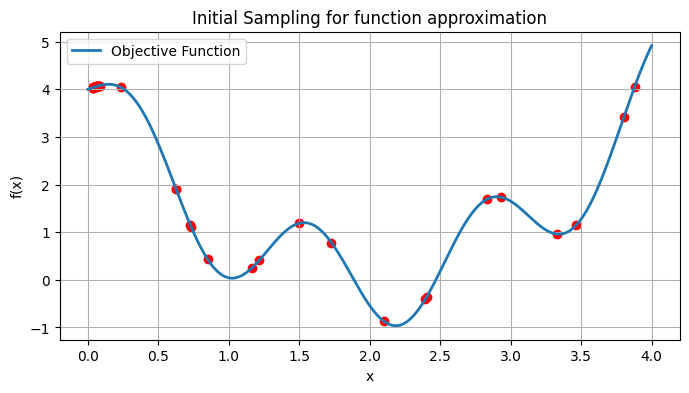

In [94]:
plt.figure(figsize=(8,4))
plt.plot(x_full, y_full, label= 'Objective Function', linewidth= '2')  
plt.scatter(x_combined, y_combined, color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Initial Sampling for function approximation')
plt.legend()
plt.grid(True)
plt.show()

# Convert to Tensor

In [105]:
x_train2 = torch.tensor(x_combined,dtype = torch.float32).unsqueeze(1)
y_train2 = torch.tensor(y_combined,dtype=torch.float32).unsqueeze(1)

In [96]:
x_train2.shape

torch.Size([40, 1, 1])

In [97]:
y_train2.shape

torch.Size([40, 1, 1])

# Model2

In [98]:
model2= nn.Sequential(nn.Linear(1, 32), nn.ReLU(), nn.Linear(32, 32), nn.Linear(32, 1))
model2

Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Linear(in_features=32, out_features=1, bias=True)
)

In [99]:
optimizer2 =optim.Adam(model2.parameters(), lr=0.01)
optimizer2

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

# Loss Function

In [100]:
criterion2 = nn.MSELoss()
criterion2

MSELoss()

In [101]:
for epoch in range(100):
    optimizer2.zero_grad()
    y_pred2 = model2(x_train2)
    loss2 = criterion2(y_pred2, y_train2)
    loss2.backward()
    optimizer2.step()

In [102]:
x_train2.shape

torch.Size([40, 1, 1])

In [103]:
y_pred2.shape

torch.Size([40, 1, 1])

In [104]:
## Make predictions using the second model across the full input range

In [106]:
x_full2_tensor = torch.tensor(x_full,dtype=torch.float32).unsqueeze(1)
#x_full2_tensor

In [107]:
with torch.no_grad():
    y_pred2_full = model2(x_full2_tensor).squeeze().numpy()

In [108]:
y_pred2_full.shape

(400,)

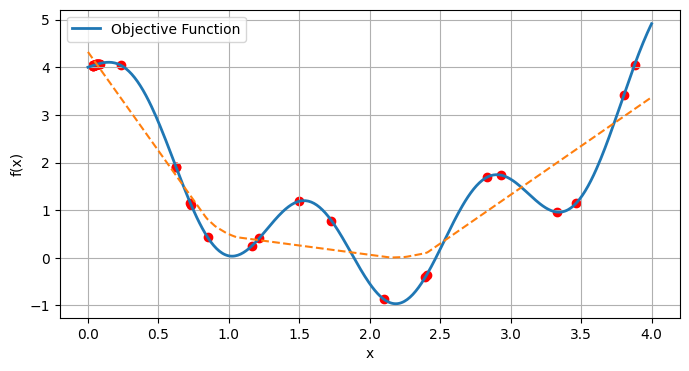

In [109]:
plt.figure(figsize=(8,4))
plt.plot(x_full, y_full, label= 'Objective Function', linewidth= 2)

plt.plot(x_full, y_pred2_full, label= '', linestyle= '--') # <--ValueError: x and y must have same first dimension, but have shapes (400,) and (2, 20)
                                                              
plt.scatter(x_combined, y_combined, color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()